In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

#Speed up image training 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# copy all of images part 2 to content
zip_path = "/content/drive/MyDrive/HAM10000/HAM10000_images_part_2.zip"

!cp "{zip_path}" .

!unzip -q HAM10000_images_part_2.zip

!rm HAM10000_images_part_2.zip

In [4]:
# import os
# os.chdir("/content/drive/MyDrive/HAM10000/HAM10000_images_part_2/")
# !ls -1 | wc -l

In [5]:
# for file in os.listdir("/content/HAM10000_images_part_1"):
#   print(file)

In [6]:
# copy all of images part 1 to content
zip_path = "/content/drive/MyDrive/HAM10000/HAM10000_images_part_1.zip"

!cp "{zip_path}" .

!unzip -q HAM10000_images_part_1.zip

!rm HAM10000_images_part_1.zip

In [7]:
# copy all of the augmented images to content
zip_path = "/content/drive/MyDrive/HAM10000/HAM10000_images_augmented.zip"

!cp "{zip_path}" .

!unzip -q HAM10000_images_augmented.zip

!rm HAM10000_images_augmented.zip

In [8]:
import os
import pandas as pd 
import numpy as np 
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

# os.chdir("/content/drive/MyDrive/HAM10000")
# !ls

In [9]:
#get metadata
mdata = pd.read_csv("/content/drive/MyDrive/HAM10000/HAM10000_metadata.csv")
md = mdata


In [10]:
# #try and balance the dataset - this idea is somewhat flawed. 
# from pandas.core.common import random_state
# from sklearn.utils import resample
# #bkl': 0, 'nv': 1, 'df': 2, 'mel': 3, 'vasc': 4, 'bcc': 5, 'akiec': 6
# dx_0 = md[md['dx'] == "bkl"]
# dx_1 = md[md['dx'] == "nv"]
# dx_2 = md[md['dx'] == "df"]
# dx_3 = md[md['dx'] == "mel"]
# dx_4 = md[md['dx'] == "vasc"]
# dx_5 = md[md['dx'] == "bcc"]
# dx_6 = md[md['dx'] == "akiec"]
# #subset and random resample of data by diagnosis
# n = 1000
# dx_0_balanced = resample(dx_0, replace=True, n_samples=n, random_state=29) 
# dx_1_balanced = resample(dx_1, replace=True, n_samples=n, random_state=29) 
# dx_2_balanced = resample(dx_2, replace=True, n_samples=n, random_state=29)
# dx_3_balanced = resample(dx_3, replace=True, n_samples=n, random_state=29)
# dx_4_balanced = resample(dx_4, replace=True, n_samples=n, random_state=29)
# dx_5_balanced = resample(dx_5, replace=True, n_samples=n, random_state=29)
# dx_6_balanced = resample(dx_6, replace=True, n_samples=n, random_state=29)

In [11]:
# mdata = pd.concat([dx_0_balanced, dx_1_balanced, dx_2_balanced, dx_3_balanced, dx_4_balanced, dx_5_balanced, dx_6_balanced])

In [12]:
#transform the function according to the pytorch docs
from torchvision import transforms
from PIL import Image
img_size = 224
preprocess = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    # transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# preprocess2 = preprocess = transforms.Compose([
    
# ])
# input_tensor = preprocess(input_image)
# input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

In [13]:
from pyparsing.helpers import identbodychars
class DermClassHelper(): 
  #make images 50 x 50 to start 
  mdata = pd.read_csv("/content/drive/MyDrive/HAM10000/HAM10000_metadata.csv").append(pd.read_csv("/content/drive/MyDrive/HAM10000/HAM10000_metadata_augmented.csv"))
  IMG_SIZE = 224
  labels = {}
  img_map = {}
  #training data 
  training_data = []
  # track balance 
  balance = {}
  #relavent directories 
  sds = ["/HAM10000_images_part_1/", "/HAM10000_images_part_2/", "/HAM10000_images_augmented/"]
  root = "/content"

  def __init__(self):
    #assign labels
    self.make_labels()
    #make the map
    self.make_image_map()
    print(self.labels, self.img_map)
  """ Assign numbers to the diagnosis types"""
  def make_labels(self):
    i = 0 
    for d in self.mdata["dx"].unique():
      self.labels[d] = i 
      i += 1
  """ Assign to each image the corresponding label """
  def make_image_map(self):
    for im, dx in zip(list(self.mdata["image_id"]), list(self.mdata["dx"])):
      self.img_map[im] = self.labels[dx]

  def make_training_data(self):
    for sd in self.sds:
      for f in tqdm(os.listdir(self.root+sd)):
        # extract the image id from the file path
        id = f.split(".")[0].strip(" ").split(" ")[0]
        if id in self.img_map: 
          if self.img_map[id] not in self.balance:
            self.balance[self.img_map[id]] = 0
          self.balance[self.img_map[id]] += 1
    print(self.balance)

In [14]:
dch = DermClassHelper()
dch.make_training_data()
print(dch.balance)

{'bkl': 0, 'nv': 1, 'df': 2, 'mel': 3, 'vasc': 4, 'bcc': 5, 'akiec': 6} {'ISIC_0027419': 0, 'ISIC_0025030': 0, 'ISIC_0026769': 0, 'ISIC_0025661': 0, 'ISIC_0031633': 0, 'ISIC_0027850': 0, 'ISIC_0029176': 0, 'ISIC_0029068': 0, 'ISIC_0025837': 0, 'ISIC_0025209': 0, 'ISIC_0025276': 0, 'ISIC_0029396': 0, 'ISIC_0025984': 0, 'ISIC_0025767': 0, 'ISIC_0032417': 0, 'ISIC_0031326': 0, 'ISIC_0025915': 0, 'ISIC_0031029': 0, 'ISIC_0029836': 0, 'ISIC_0032129': 0, 'ISIC_0032343': 0, 'ISIC_0025033': 0, 'ISIC_0027310': 0, 'ISIC_0032128': 0, 'ISIC_0025937': 0, 'ISIC_0027828': 0, 'ISIC_0029291': 0, 'ISIC_0030698': 0, 'ISIC_0025567': 0, 'ISIC_0031753': 0, 'ISIC_0026835': 0, 'ISIC_0031159': 0, 'ISIC_0031017': 0, 'ISIC_0024981': 0, 'ISIC_0027815': 0, 'ISIC_0024324': 0, 'ISIC_0029559': 0, 'ISIC_0030661': 0, 'ISIC_0027053': 0, 'ISIC_0028560': 0, 'ISIC_0031650': 0, 'ISIC_0029161': 0, 'ISIC_0026273': 0, 'ISIC_0025076': 0, 'ISIC_0029687': 0, 'ISIC_0025642': 0, 'ISIC_0025819': 0, 'ISIC_0032013': 0, 'ISIC_0031691':

100%|██████████| 6006/6006 [00:00<00:00, 252040.96it/s]

{1: 6705, 0: 2100, 5: 1515, 3: 2114, 2: 1116, 6: 1328, 4: 1143}
{1: 6705, 0: 2100, 5: 1515, 3: 2114, 2: 1116, 6: 1328, 4: 1143}


In [15]:
from skimage import io

In [16]:
#write a different data loader class 
from torch.utils.data import DataLoader
class DermClass():
  def __init__(self, helper, csv_file, root_dir, sds, transform1=None):
    self.derm_frame = pd.read_csv(csv_file)
    # self.derm_frame = mdata
    self.root_dir = root_dir
    self.sds = sds 
    self.transform1 = transform1
    #pass in derm class helper here
    self.helper = helper

  def __len__(self):
    return len(self.derm_frame)

  def __getitem__(self, index):
    #1 is the image file col 
    filename = self.derm_frame.iloc[index, 1]
    img_path = None
    #find the image path  
    if os.path.exists(str(self.root_dir+self.sds[0]+filename+".jpg")):
      img_path = str(self.root_dir+self.sds[0]+filename+".jpg")
    elif os.path.exists(str(self.root_dir+self.sds[1]+filename+".jpg")):
      img_path = str(self.root_dir+self.sds[1]+filename+".jpg")

    #get the image using PIL 
    img = Image.open(img_path)
    # y_label = torch.tensor(np.eye(len(self.helper.labels))[self.helper.img_map[filename]]) #this is good for adam optim 
    y_label = torch.tensor(int(self.helper.img_map[filename]))

    if self.transform1: 
      image = self.transform1(img)
    return (image, y_label, filename)

In [17]:
class AugmentedDermClass():
  def __init__(self, test_img_names, helper, csv_file, root_dir, sd, transform1=None):
    self.derm_frame = pd.read_csv(csv_file)
    #get the original ids 
    original_ids = []
    for id in self.derm_frame["image_id"]:
      new_id = id[0:len(id)]
      original_ids.append(new_id)
    self.derm_frame["original_id"] = original_ids
    print(len(self.derm_frame))
    #update the pd such that only the rows not in test_img_names remain 
    self.derm_frame = self.derm_frame[~self.derm_frame["original_id"].isin(test_img_names)]
    print(len(self.derm_frame))

    self.root_dir = root_dir
    self.sd = sd
    self.transform1 = transform1
    #pass in derm class helper here
    self.helper = helper
    self.test_img_names = test_img_names
  def __len__(self):
    return len(self.derm_frame)

  def __getitem__(self, index):
    #1 is the image file col 
    filename = self.derm_frame.iloc[index, 1]
    # dataset = self.derm_frame.iloc[index, 7]
    img_path = None
    #find the image path  
    if os.path.exists(str(self.root_dir+self.sd+filename+".jpg")):
      img_path = str(self.root_dir+self.sd+filename+".jpg")

    #get the image using PIL 
    img = Image.open(img_path)
    # y_label = torch.tensor(np.eye(len(self.helper.labels))[self.helper.img_map[filename]]) #this is good for adam optim 
    y_label = torch.tensor(int(self.helper.img_map[filename]))

    if self.transform1: 
      image = self.transform1(img)
    return (image, y_label, filename)

In [18]:
# g = DermClass(helper=dch, csv_files=["/content/drive/MyDrive/HAM10000/HAM10000_metadata.csv", "/content/drive/MyDrive/HAM10000/HAM10000_metadata_augmented.csv"], root_dir="/content/drive/MyDrive/HAM10000", sds=["/HAM10000_images_part_1/", "/HAM10000_images_part_2/", "/HAM10000_images_augmented/"], transform1=preprocess)
# g.__getitem__(11000)


In [19]:
#hyperparams
in_channel = 3
num_classes = 7
learning_rate = 1e-3
batch_size = 64
num_epochs =35 #20 works well - it seems as tho it is a local min 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [20]:
dataset = DermClass(helper=dch, csv_file="/content/drive/MyDrive/HAM10000/HAM10000_metadata.csv", root_dir="/content", sds=["/HAM10000_images_part_1/", "/HAM10000_images_part_2/"], transform1=preprocess)

In [21]:
#here, we need to find a way to add augmented images to training and exclude them from testing 
train_set, test_set = torch.utils.data.random_split(dataset, [int(len(dataset)*.8), int(len(dataset)*.2)])

In [22]:
#but it is not as simple as adding the augmented dataset here to the train dataset -- for we want to ensure that none of the images in the test set are captured in the augmented data, even if they look different b/c of alteration 
test_img_names = set()
for img, label, name in tqdm(test_set):
  name_mod = name.split(".")[0]
  test_img_names.add(name_mod)

augmented_dataset = AugmentedDermClass(test_img_names=test_img_names, helper=dch, csv_file="/content/drive/MyDrive/HAM10000/HAM10000_metadata_augmented.csv", root_dir="/content", sd= "/HAM10000_images_augmented/", transform1=preprocess)

100%|██████████| 2003/2003 [00:24<00:00, 80.15it/s]

6006
5357


In [23]:
# add the augmented data to the train set
train_set = torch.utils.data.ConcatDataset([train_set, augmented_dataset])


train_loader = DataLoader(dataset = train_set, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(dataset = test_set, batch_size = batch_size, shuffle=True)

In [24]:
len(train_loader)

209

In [25]:
# dataset.__getitem__(0)

In [26]:
#import pretrained 
import torch
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18',  pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)


Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [27]:
#we can also set the first, say, n layers to be frozen, and leave the remaining layers unfrozen, as follows 

thresh = 6
ct = 0
#here we freeze up to and including the 6th layer
for child in model.children():
  if ct <= thresh:
    for param in child.parameters():
        param.requires_grad = False
  print(child, ct)
  ct += 1

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) 0
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) 1
ReLU(inplace=True) 2
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False) 3
Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine

In [28]:
# #fine tuning - set all of the model gradients to false
# for param in model.parameters():
#   param.requires_grad = False

#change the model architecture a bit
model.fc = nn.Sequential(nn.Linear(2048, 100), 
                         nn.ReLU(), 
                         nn.Dropout(p=.5), 
                         nn.Linear(100,7))
model
#might need to add the embedding for sex here
 
#change mode and put on device
# model.eval()
model.train()
model.to(device)

#example of how to add layers, where net_add is basically the new network that we are interested in: https://discuss.pytorch.org/t/add-layers-on-pretrained-model/88760
# net_add=net()
# model = nn.Sequential(resnet50, net_add)
# model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [29]:
# Check accuracy on training to see how good our model is
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    correct = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
    total = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
    with torch.no_grad():
        for x, y, name in tqdm(loader):
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)
            for i,j in zip(predictions, y):
              if i.item() == j.item():
                correct[i.item()] +=1
              total[j.item()] += 1
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(
              f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}"
          )
        acc = num_correct/num_samples
        #find the accuracies for each class 
        return acc, correct, total

    model.train()

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

def make_confusion(test_loader, model):
  y_pred = []
  y_true = []
  model.eval()
  # iterate over test data
  for inputs, labels, name in tqdm(test_loader):
          inputs = inputs.to(device=device)
          labels = labels.to(device=device)

          output = model(inputs) # Feed Network
          output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
          
          y_pred.extend(output) # Save Prediction
          labels = labels.data.cpu().numpy()
          y_true.extend(labels) # Save Truth
  # constant for classes
  # bkl': 0, 'nv': 1, 'df': 2, 'mel': 3, 'vasc': 4, 'bcc': 5, 'akiec': 6
  classes = ["bkl", "nv", "df", "mel", "vasc", "bcc", "akiec"]

  # Build confusion matrix
  cm = confusion_matrix(y_true, y_pred, normalize='true')
  df_cm = pd.DataFrame(cm, index = [i for i in classes],
                      columns = [i for i in classes])
  plt.figure(figsize = (12,7))
  sn.heatmap(df_cm, annot=True)
  plt.savefig('/content/drive/MyDrive/HAM10000/confusion_matrices/confusion_resnet101_SA.png')


In [34]:
#here are our metrics to track the best model accuracy 
best_acc = 0
best_acc_classes = {}

209it [03:22,  1.03it/s]


Cost at epoch 0 is 0.6785398601915278


100%|██████████| 32/32 [00:34<00:00,  1.09s/it]


tensor(0.7958, device='cuda:0')


209it [03:23,  1.03it/s]


Cost at epoch 1 is 0.49806171812509237


100%|██████████| 32/32 [00:34<00:00,  1.07s/it]


tensor(0.8208, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 2 is 0.38059242269354004


100%|██████████| 32/32 [00:32<00:00,  1.01s/it]


tensor(0.8382, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 3 is 0.2794469035983656


100%|██████████| 32/32 [00:31<00:00,  1.01it/s]


tensor(0.8357, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 4 is 0.21663830329499176


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


tensor(0.8303, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 5 is 0.16987858688610308


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


Got 1698 / 2003 with accuracy 84.77
for class 0, the accuracy is: 0.652000
for class 1, the accuracy is: 0.958079
for class 2, the accuracy is: 0.906250
for class 3, the accuracy is: 0.486726
for class 4, the accuracy is: 0.909091
for class 5, the accuracy is: 0.793814
for class 6, the accuracy is: 0.656250


100%|██████████| 32/32 [00:31<00:00,  1.01it/s]


tensor(0.8477, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 6 is 0.12005762455976038


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


tensor(0.8432, device='cuda:0')


209it [03:18,  1.05it/s]


Cost at epoch 7 is 0.10506047507409345


100%|██████████| 32/32 [00:32<00:00,  1.01s/it]


tensor(0.8362, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 8 is 0.09138592340845311


100%|██████████| 32/32 [00:31<00:00,  1.01it/s]


tensor(0.8472, device='cuda:0')


209it [03:18,  1.05it/s]


Cost at epoch 9 is 0.066874062737147


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


Got 1710 / 2003 with accuracy 85.37
for class 0, the accuracy is: 0.760000
for class 1, the accuracy is: 0.944360
for class 2, the accuracy is: 0.843750
for class 3, the accuracy is: 0.632743
for class 4, the accuracy is: 0.909091
for class 5, the accuracy is: 0.659794
for class 6, the accuracy is: 0.421875


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


tensor(0.8537, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 10 is 0.06077737595137369


100%|██████████| 32/32 [00:31<00:00,  1.01it/s]


tensor(0.8303, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 11 is 0.05548034244970058


100%|██████████| 32/32 [00:31<00:00,  1.00it/s]


tensor(0.8402, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 12 is 0.059046984061990916


100%|██████████| 32/32 [00:32<00:00,  1.03s/it]


tensor(0.8472, device='cuda:0')


209it [03:18,  1.05it/s]


Cost at epoch 13 is 0.05565389440089696


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


tensor(0.8507, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 14 is 0.03564898309110704


100%|██████████| 32/32 [00:31<00:00,  1.01it/s]


tensor(0.8432, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 15 is 0.04813940233927505


100%|██████████| 32/32 [00:31<00:00,  1.01it/s]


tensor(0.8442, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 16 is 0.04242656450789939


100%|██████████| 32/32 [00:32<00:00,  1.03s/it]


tensor(0.8342, device='cuda:0')


209it [03:20,  1.04it/s]


Cost at epoch 17 is 0.040994025063344486


100%|██████████| 32/32 [00:32<00:00,  1.03s/it]


tensor(0.8397, device='cuda:0')


209it [03:20,  1.04it/s]


Cost at epoch 18 is 0.04029073111120273


100%|██████████| 32/32 [00:32<00:00,  1.01s/it]


tensor(0.8392, device='cuda:0')


209it [03:17,  1.06it/s]


Cost at epoch 19 is 0.04803818660792694


100%|██████████| 32/32 [00:32<00:00,  1.03s/it]


tensor(0.8422, device='cuda:0')


209it [03:18,  1.05it/s]


Epoch 00021: reducing learning rate of group 0 to 1.0000e-04.
Cost at epoch 20 is 0.0412983355119615


100%|██████████| 32/32 [00:33<00:00,  1.05s/it]


tensor(0.8402, device='cuda:0')


209it [03:17,  1.06it/s]


Cost at epoch 21 is 0.021763527621047205


100%|██████████| 32/32 [00:32<00:00,  1.03s/it]


tensor(0.8462, device='cuda:0')


209it [03:18,  1.05it/s]


Cost at epoch 22 is 0.01124158112190744


100%|██████████| 32/32 [00:32<00:00,  1.03s/it]


tensor(0.8497, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 23 is 0.008409129572275003


100%|██████████| 32/32 [00:31<00:00,  1.00it/s]


tensor(0.8532, device='cuda:0')


209it [03:20,  1.04it/s]


Cost at epoch 24 is 0.00678031510510468


100%|██████████| 32/32 [00:32<00:00,  1.03s/it]


tensor(0.8522, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 25 is 0.0062377156059505


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


tensor(0.8532, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 26 is 0.004699991494038423


100%|██████████| 32/32 [00:31<00:00,  1.00it/s]


tensor(0.8527, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 27 is 0.005311724526352866


100%|██████████| 32/32 [00:33<00:00,  1.03s/it]


Got 1715 / 2003 with accuracy 85.62
for class 0, the accuracy is: 0.684000
for class 1, the accuracy is: 0.960366
for class 2, the accuracy is: 0.875000
for class 3, the accuracy is: 0.544248
for class 4, the accuracy is: 0.954545
for class 5, the accuracy is: 0.762887
for class 6, the accuracy is: 0.593750


100%|██████████| 32/32 [00:32<00:00,  1.03s/it]


tensor(0.8562, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 28 is 0.0034824044845724518


100%|██████████| 32/32 [00:32<00:00,  1.03s/it]


tensor(0.8552, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 29 is 0.004031194551947719


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


tensor(0.8547, device='cuda:0')


209it [03:18,  1.05it/s]


Cost at epoch 30 is 0.0026121361610003686


100%|██████████| 32/32 [00:33<00:00,  1.05s/it]


tensor(0.8532, device='cuda:0')


209it [03:18,  1.05it/s]


Cost at epoch 31 is 0.0036069903758027904


100%|██████████| 32/32 [00:33<00:00,  1.03s/it]


tensor(0.8487, device='cuda:0')


209it [03:18,  1.05it/s]


Cost at epoch 32 is 0.002634411962420466


100%|██████████| 32/32 [00:32<00:00,  1.01s/it]


tensor(0.8497, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 33 is 0.0035084922819283598


100%|██████████| 32/32 [00:31<00:00,  1.01it/s]


tensor(0.8547, device='cuda:0')


209it [03:19,  1.05it/s]


Cost at epoch 34 is 0.003927827837300678


100%|██████████| 32/32 [00:32<00:00,  1.02s/it]


tensor(0.8557, device='cuda:0')


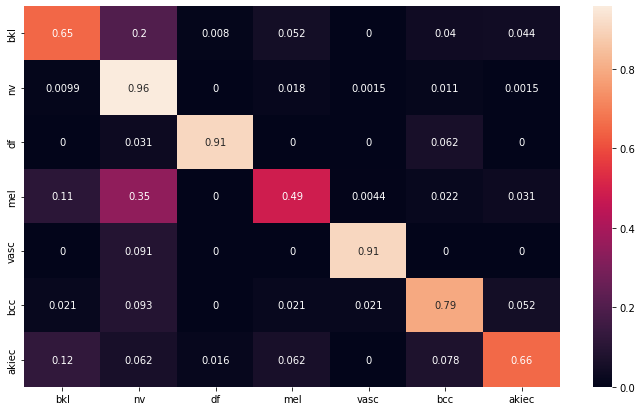

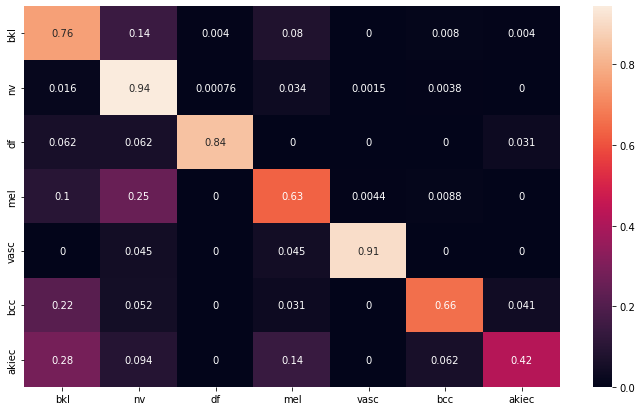

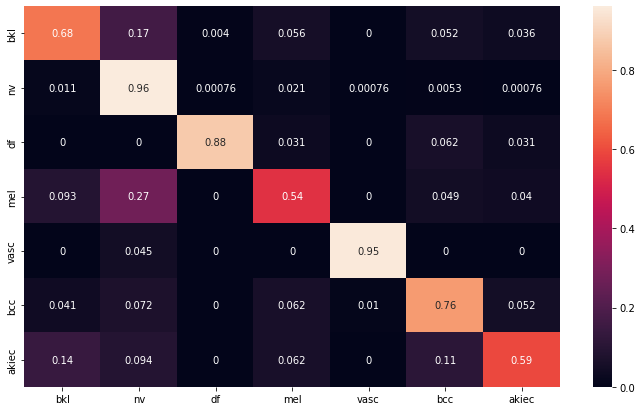

In [35]:
# Loss and optimizer
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.

# from focal_loss.focal_loss import FocalLoss
# import torchgeometry as tgm



criterion = nn.CrossEntropyLoss()
# criterion = tgm.losses.FocalLoss(alpha=0.5, gamma=2.0, reduction='mean') #experimenting with focal loss 
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=.1, patience=5, verbose=True)

#arrays to track the training loss and validation loss 
training_loss = []
validation_loss = []
test_acc = []

# Train Network
for epoch in range(num_epochs):
    losses = []
    num_correct = 0 
    num_samples = 0 
    #train part 
    for batch_idx, (data, targets, names) in tqdm(enumerate(train_loader)):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)
        # forward
        scores = model(data)
        loss = criterion(scores, targets)
        # print("Batch: %d. Loss: %f" %(batch_idx, loss))

        losses.append(loss.item())

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()
    mean_loss = sum(losses)/len(losses)
    training_loss.append(mean_loss)
    scheduler.step(mean_loss)

    print(f"Cost at epoch {epoch} is {sum(losses)/len(losses)}")
    #test the test loss after each epoch 
    test_losses = []
    #model in test mode 
    model.eval()
    acc = 0 
    with torch.no_grad():
        for x, y, name in tqdm(test_loader):
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            #find the test loss
            loss = criterion(scores, y)
            test_losses.append(loss.item())

            #find the test accuracy 
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
            #get the acc
            acc = num_correct/num_samples
        if acc > best_acc:
          best_acc = acc 
          if acc > .845:
            #get the individual accuracies
            _,correct, total = check_accuracy(test_loader, model) #2nd loop 
            for k in correct:
              best_acc_classes[k] = correct[k]/total[k]
              print("for class %d, the accuracy is: %f" %(k, correct[k]/total[k]))
            #save the confusion matrix
            make_confusion(test_loader, model) # 3rd loop 

    mean_test_loss = sum(test_losses)/len(test_losses)
    validation_loss.append(mean_test_loss)
    # test the test accuracy 
    acc = num_correct/num_samples
    print(acc)
    test_acc.append(acc.item())
    #put the model back in train mode
    model.train()




In [36]:
training_loss, validation_loss

([0.6785398601915278,
  0.49806171812509237,
  0.38059242269354004,
  0.2794469035983656,
  0.21663830329499176,
  0.16987858688610308,
  0.12005762455976038,
  0.10506047507409345,
  0.09138592340845311,
  0.066874062737147,
  0.06077737595137369,
  0.05548034244970058,
  0.059046984061990916,
  0.05565389440089696,
  0.03564898309110704,
  0.04813940233927505,
  0.04242656450789939,
  0.040994025063344486,
  0.04029073111120273,
  0.04803818660792694,
  0.0412983355119615,
  0.021763527621047205,
  0.01124158112190744,
  0.008409129572275003,
  0.00678031510510468,
  0.0062377156059505,
  0.004699991494038423,
  0.005311724526352866,
  0.0034824044845724518,
  0.004031194551947719,
  0.0026121361610003686,
  0.0036069903758027904,
  0.002634411962420466,
  0.0035084922819283598,
  0.003927827837300678],
 [0.5740810576826334,
  0.5017424244433641,
  0.5072667081840336,
  0.5932644228450954,
  0.6817405233159661,
  0.6368152480572462,
  0.6213868982158601,
  0.735710684210062,
  0.8067

In [37]:
#check final accuracy

# print("Checking accuracy on Training Set")
# check_accuracy(train_loader, model)

print("Checking accuracy on Test Set")
acc, correct, total = check_accuracy(test_loader, model)

for k in correct:
  print("for class %d, the accuracy is: %f" %(k, correct[k]/total[k]))

Checking accuracy on Test Set


100%|██████████| 32/32 [00:32<00:00,  1.00s/it]

Got 1714 / 2003 with accuracy 85.57
for class 0, the accuracy is: 0.708000
for class 1, the accuracy is: 0.954268
for class 2, the accuracy is: 0.812500
for class 3, the accuracy is: 0.575221
for class 4, the accuracy is: 0.863636
for class 5, the accuracy is: 0.742268
for class 6, the accuracy is: 0.593750


In [38]:
print(correct, total)


{0: 177, 1: 1252, 2: 26, 3: 130, 4: 19, 5: 72, 6: 38} {0: 250, 1: 1312, 2: 32, 3: 226, 4: 22, 5: 97, 6: 64}


In [39]:
# torch.save(model.state_dict(), "/content/drive/MyDrive/HAM10000/models/resnet101tlaug.pt")

In [40]:
for i in range(len(test_acc)):
  test_acc[i] =  test_acc[i]

In [41]:
print(test_acc)
print(max(test_acc))

[0.7958062887191772, 0.8207688331604004, 0.8382426500320435, 0.8357464075088501, 0.8302546143531799, 0.847728431224823, 0.8432351350784302, 0.8362456560134888, 0.8472291827201843, 0.8537194132804871, 0.8302546143531799, 0.8402396440505981, 0.8472291827201843, 0.850723922252655, 0.8432351350784302, 0.8442336320877075, 0.8342486023902893, 0.8397403955459595, 0.8392411470413208, 0.8422366380691528, 0.8402396440505981, 0.8462306261062622, 0.8497254252433777, 0.8532201647758484, 0.852221667766571, 0.8532201647758484, 0.8527209162712097, 0.8562156558036804, 0.8552171587944031, 0.8547179102897644, 0.8532201647758484, 0.8487269282341003, 0.8497254252433777, 0.8547179102897644, 0.8557164072990417]
0.8562156558036804


# Graphics/Stats

In [42]:
import matplotlib.pyplot as plt
from numpy import arange


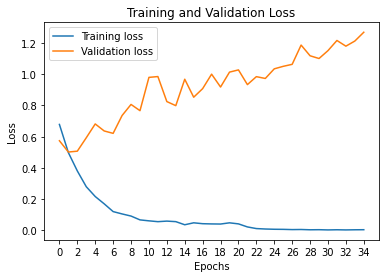

<Figure size 432x288 with 0 Axes>

In [43]:
plt.plot([i for i in range(num_epochs)], training_loss, label="Training loss")
plt.plot([i for i in range(num_epochs)], validation_loss, label="Validation loss")
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.xticks(arange(0, num_epochs, 2))

# Display the plot
plt.legend(loc='best')
plt.show()
plt.savefig('training_progress.png')

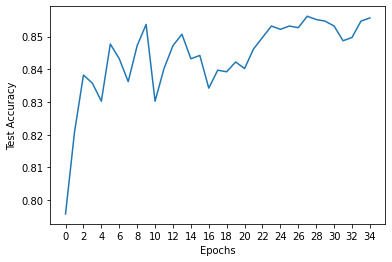

In [44]:
plt.plot([i for i in range(num_epochs)], test_acc, label="Accuracy")
plt.xticks(arange(0, num_epochs, 2))

plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.show()

#Confusion Matrix

In [45]:
#load the best model 
model_path = "/content/drive/MyDrive/HAM10000/models/ResidualNets/ResNet101_SA.pt"
best_model = model 
best_model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for inputs, labels, name in tqdm(test_loader):
        inputs = inputs.to(device=device)
        labels = labels.to(device=device)

        output = best_model(inputs) # Feed Network
        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        
        y_pred.extend(output) # Save Prediction
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth



100%|██████████| 32/32 [00:33<00:00,  1.03s/it]


[[ 228    9    1    8    0    2    2]
 [   3 1301    1    7    0    0    0]
 [   0    2   30    0    0    0    0]
 [   3   13    1  208    0    0    1]
 [   0    1    0    0   21    0    0]
 [   1    4    0    0    0   90    2]
 [   1    1    0    4    0    0   58]]


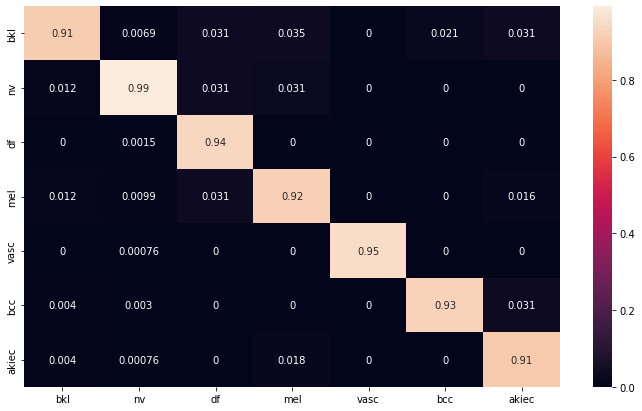

In [47]:
# constant for classes
# bkl': 0, 'nv': 1, 'df': 2, 'mel': 3, 'vasc': 4, 'bcc': 5, 'akiec': 6
classes = ["bkl", "nv", "df", "mel", "vasc", "bcc", "akiec"]

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix, axis=1), index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('confusion_matrix.png')

In [48]:
# from google.colab import runtime
# runtime.unassign()